<a href="https://colab.research.google.com/github/NoerNikmat/image_recognition_rockpaperscissors-/blob/main/predicting_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE RECOGNITION USING CONVULUTIONAL NEURAL NETWORK


#### Dataset: Rock, Paper, Scissors Images
Link Dataset : https://www.kaggle.com/drgfreeman/rockpaperscissors/download

# PROGRAMMING USING PYTHON

##  Import Dataset and Extract Zip Files

Install Kaggle for upload dataset into google colab

In [1]:
!pip install -q kaggle

Upload Kaggle API key

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"5c61dd059665969d566be961b002599c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset from Kaggle

In [4]:
! kaggle datasets download -d 'drgfreeman/rockpaperscissors/download'  

 96% 293M/306M [00:02<00:00, 92.7MB/s]
100% 306M/306M [00:02<00:00, 117MB/s] 


In [5]:
!ls

kaggle.json  rockpaperscissors.zip  sample_data


In [6]:
!unzip -q rockpaperscissors.zip

In [7]:
!ls

kaggle.json  README_rpc-cv-images.txt  rockpaperscissors.zip  sample_data
paper	     rock		       rps-cv-images	      scissors


## Import library

In [8]:
import zipfile,os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras import optimizers
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
print(tf.__version__) 

2.4.0


In [10]:
os.listdir()

['.config',
 'paper',
 'rock',
 'scissors',
 'rockpaperscissors.zip',
 'rps-cv-images',
 'README_rpc-cv-images.txt',
 'kaggle.json',
 'sample_data']

In [11]:
os.listdir('rps-cv-images')

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [12]:
rps_image = 'rps-cv-images'
rock_im = 'rock'
paper_im ='paper'
scissors_im = 'scissors'

rock_data = os.listdir(os.path.join(rps_image,rock_im))
paper_data = os.listdir(os.path.join(rps_image,paper_im))
scissors_data = os.listdir(os.path.join(rps_image,scissors_im))

print('Number of Rock images:', len(rock_data))
print('Number of Paper images:', len(paper_data))
print('Number of Scissors images:', len(scissors_data))

Number of Rock images: 726
Number of Paper images: 712
Number of Scissors images: 750


##Image Augmentation using Image Data Generator

In [13]:
img_generator = ImageDataGenerator(validation_split=0.4, 
                                   rescale = 1./255)

train_generator = img_generator.flow_from_directory(rps_image,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = img_generator.flow_from_directory(rps_image,
                                                         target_size=(150,150),
                                                         batch_size=4,
                                                         class_mode='categorical',
                                                         subset='validation')


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


For "Found 1314 images belonging to 3 classes", it means that there are 1314 images for training data. Meanwhile, "Found 874 pictures belonging to 3 classes" shows that there are 874 validation data with the same three classes as the training data, namely Rock, Paper, and Scissors.

## Modeling with Sequential Model

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

## Training Model

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Fit Model for Data Training

In [17]:
history = model.fit(
    train_generator, 
    validation_data  = validation_generator,
    epochs = 30,
    steps_per_epoch = 30,
    verbose=1)

Epoch 1/30
30/30 [==============================] - 22s 737ms/step - loss: 1.1269 - accuracy: 0.2775 - val_loss: 1.0982 - val_accuracy: 0.3318
Epoch 2/30
30/30 [==============================] - 21s 728ms/step - loss: 1.0961 - accuracy: 0.4148 - val_loss: 1.0811 - val_accuracy: 0.3318
Epoch 3/30
30/30 [==============================] - 22s 745ms/step - loss: 1.0070 - accuracy: 0.5301 - val_loss: 0.8156 - val_accuracy: 0.6121
Epoch 4/30
30/30 [==============================] - 22s 753ms/step - loss: 1.4485 - accuracy: 0.4199 - val_loss: 1.0910 - val_accuracy: 0.3432
Epoch 5/30
30/30 [==============================] - 22s 744ms/step - loss: 1.0685 - accuracy: 0.4323 - val_loss: 1.1728 - val_accuracy: 0.3432
Epoch 6/30
30/30 [==============================] - 22s 744ms/step - loss: 0.8554 - accuracy: 0.5571 - val_loss: 0.5449 - val_accuracy: 0.8364
Epoch 7/30
30/30 [==============================] - 22s 737ms/step - loss: 0.5377 - accuracy: 0.7917 - val_loss: 0.3548 - val_accuracy: 0.8616

Visualization of the Training Model

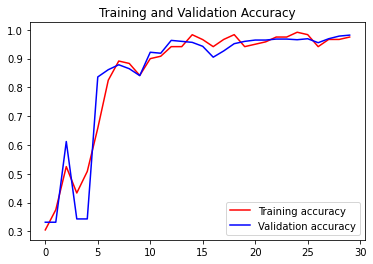

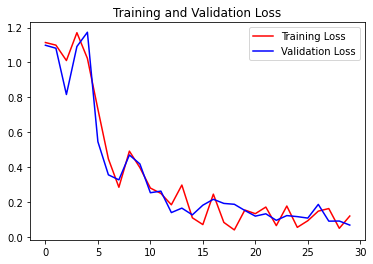

<Figure size 432x288 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

The graph titled "Validation Training and Accuracy" that could see, the distance of training data and validation is close so that overfitting does not occur.

## Image Prediction Output



Saving 1 (3).png to 1 (3).png
1 (3).png
This image is scissors


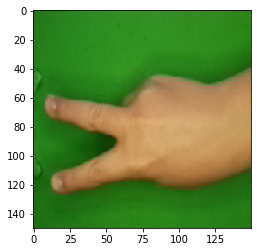

In [43]:
uploaded = files.upload()
#uploaded = files.upload() 
for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)

  print(fn)
  if classes[0,0]!=0:
    print('This image is paper')
  elif classes[0,1]!=0:
    print('This image is rock')
  else:
    print('This image is scissors')